In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

### Universal bank dataset


For this lab, we will use the Universal bank dataset. You will use different classification methods to predict is given a personal loan. There are a total of 5,000 customers in the data set and 14 variables. The variables are self-explanatory.

### Data Preparation

## 1. 1. Read dataframe. Do not include ID and Zip Code in the analysis. 

In [2]:
ubank = pd.read_csv('../dmba/UniversalBank.csv')
ubank.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

## 2. 2.Convert categorical variables as dummies.

There are __three levels of education__ [1,2,3], so I got the dummy variables for it. <br> I renamed the levels of education as well, so it is easy to see what they refer to.

Lastly, I changed the data type of __Personal Loan__ to categorical, since it is our target variable.  

In [3]:
ubank['Education'] = ubank['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
ubank.Education.cat.rename_categories(new_categories, inplace=True)
ubank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [4]:
ubank = pd.get_dummies(ubank, prefix_sep = '_', drop_first=True)
ubank.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


In [5]:
ubank.rename(columns = {'Education_Graduate': 'Graduate','Education_Advanced/Professional':'Advanced/Professional'}, inplace = True)
ubank.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Graduate,Advanced/Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


In [6]:
ubank['Personal Loan'] = ubank['Personal Loan'].astype('category') ## outcome/target variable

## Alternative Method to get education dummies

In [7]:
## ubank = pd.get_dummies(ubank, columns = ['Education'], drop_first = True)
## ubank

## 3. 3.Use a 70/30 split into train/valid. Create trainx, trainy, validx, validy

In [8]:
predictors = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Graduate', 'Advanced/Professional', 'Mortgage', 
              'Securities Account', 'CD Account', 'Online', 'CreditCard']

outcome = 'Personal Loan' #'target variable'

x = ubank[predictors]
y = ubank[outcome]

# partition data
trainx, validx, trainy, validy = train_test_split(x, y, test_size=0.3, random_state=1)
print('Training set:', trainx.shape, 'Validation set:', validx.shape)

Training set: (3500, 12) Validation set: (1500, 12)


In [9]:
###################################################################################
# 1. 1.	What is the target variable? How many instances are 1?                    #
###################################################################################

In [10]:
ubank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

## 1.1 Answer

The target variable is Personal Loan, which has two values of 0 and 1. We are prediciting which variables determine if someone gets a loan or not. 0 = to those who do not get a loan, while 1 = those who do get a loan. 

480 instances are 1, so this is the minority class.

In [11]:
###################################################################################
# 2. Build three classifiers: Decision Tree, Naïve Bayes, and Logistic Regression
# For each of the three classifiers:
# a. What are the 3 most important variables? 
# b. Calculate accuracy, precision, recall, and f-measure
###################################################################################

# Decision Trees

In [12]:
dt1 = DecisionTreeClassifier(max_depth = 5)
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=5)

In [13]:
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, classification_report
# Get the prediction for both train and test
prediction_train4 = dt1.predict(trainx)
prediction_valid4 = dt1.predict(validx)

print("Accuracy on train is:",accuracy_score(trainy, prediction_train4))
print("Accuracy on test is:",accuracy_score(validy, prediction_valid4))

Accuracy on train is: 0.99
Accuracy on test is: 0.986


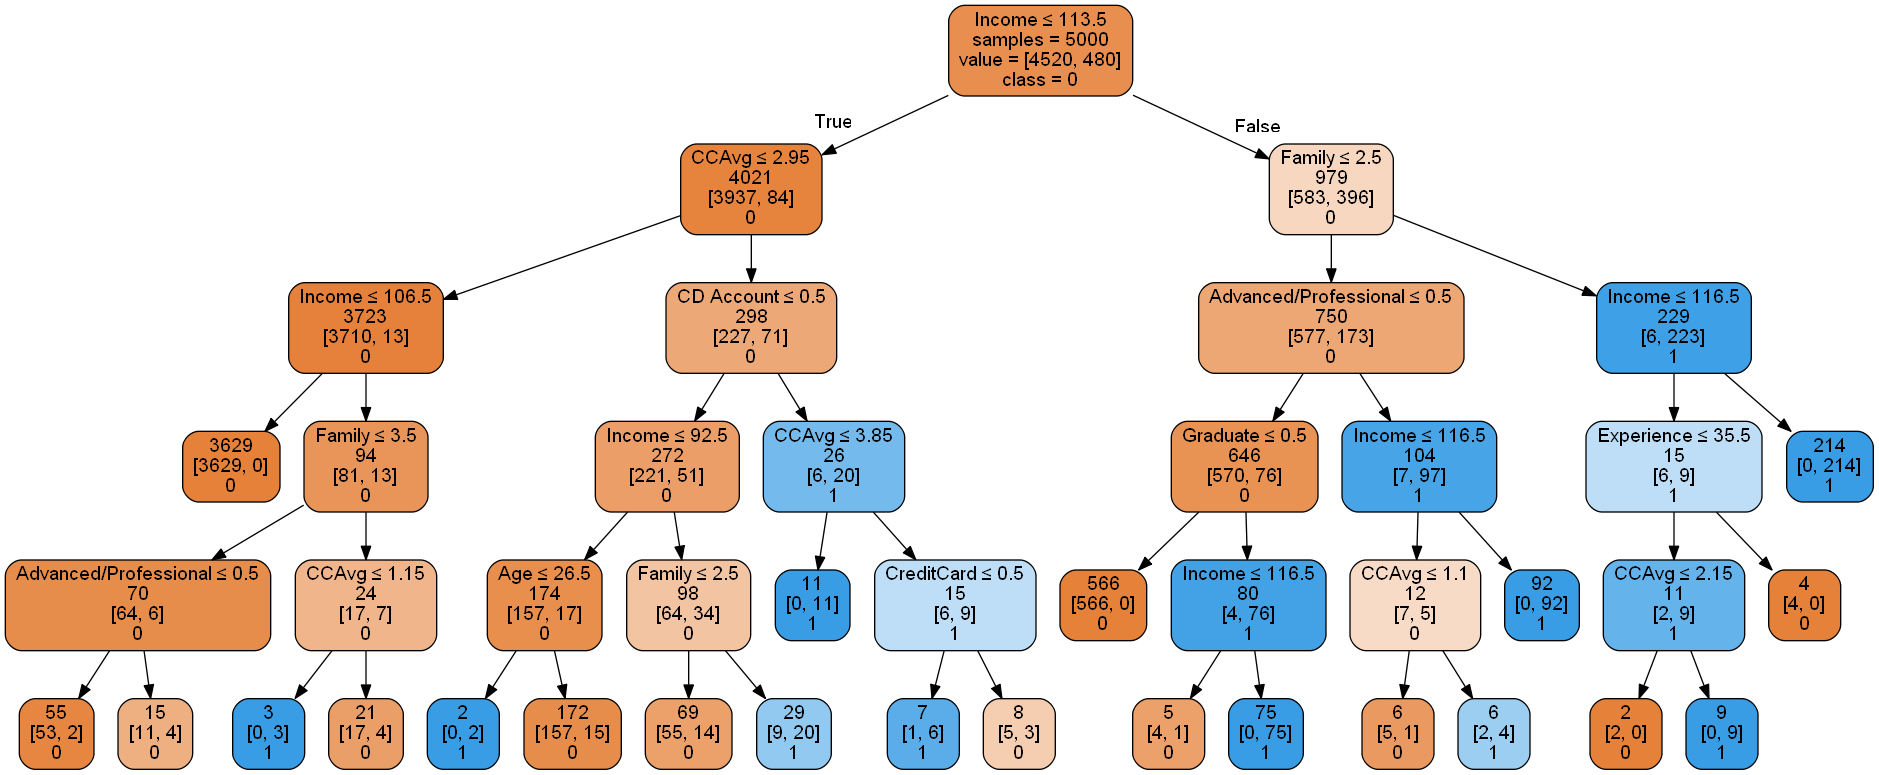

In [14]:
plotDecisionTree(dt1, feature_names=ubank[predictors].columns, class_names=dt1.classes_)

In [15]:
importances = dt1.feature_importances_
df = pd.DataFrame({'Feature': trainx.columns, 'Importance': importances})
df = df.sort_values('Importance', ascending = False)
print(df)

                  Feature  Importance
2                  Income    0.335051
3                  Family    0.263398
5                Graduate    0.162592
6   Advanced/Professional    0.154556
4                   CCAvg    0.052250
9              CD Account    0.020642
1              Experience    0.005047
0                     Age    0.004234
11             CreditCard    0.002231
7                Mortgage    0.000000
8      Securities Account    0.000000
10                 Online    0.000000


In [16]:
classificationSummary(trainy, prediction_train4)
classificationSummary(validy, prediction_valid4)

Confusion Matrix (Accuracy 0.9900)

       Prediction
Actual    0    1
     0 3162    7
     1   28  303
Confusion Matrix (Accuracy 0.9860)

       Prediction
Actual    0    1
     0 1346    5
     1   16  133


In [17]:
## On training
print("precision score: ", precision_score(trainy, prediction_train4))
print("recall score: ", recall_score(trainy, prediction_train4))
print("f1-score: ", f1_score(trainy,prediction_train4))

precision score:  0.9774193548387097
recall score:  0.9154078549848943
f1-score:  0.9453978159126366


In [18]:
## On valid
print("precision score: ", precision_score(validy, prediction_valid4))
print("recall score: ", recall_score(validy, prediction_valid4))
print("f1-score: ", f1_score(validy,prediction_valid4))

precision score:  0.9637681159420289
recall score:  0.8926174496644296
f1-score:  0.9268292682926829


The three most important variables are Income, Family, and Education (Graduate followed by Advanced) when it comes to determing whether someone gets a loan or not.

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit_reg = LogisticRegression(penalty = 'l2', solver = 'liblinear')
logit_reg.fit(trainx, trainy)

print('intercept ', logit_reg.intercept_[0])
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=x.columns).sort_values('coeff',ascending=False)

intercept  -2.1734617772643974


,coeff
Advanced/Professional,3.456730
Graduate,3.225798
CD Account,3.123138
Family,0.579039
Experience,0.372342
CCAvg,0.180667
Income,0.051394
Mortgage,0.000871
Age,-0.373896
Online,-0.586679


For Logistic Regression, the most important variables are Education (Advanced followed by Graduate), CD Account, and Family.

In [20]:
prediction_train2 = logit_reg.predict(trainx)
prediction_valid2 = logit_reg.predict(validx)
print("Accuracy on train is:",accuracy_score(trainy,prediction_train2))
print("Accuracy on test is:",accuracy_score(validy,prediction_valid2))

Accuracy on train is: 0.958
Accuracy on test is: 0.9546666666666667


In [21]:
print("precision score: ", precision_score(validy, prediction_valid2))
print("recall score: ", recall_score(validy, prediction_valid2))
print("f1-score: ", f1_score(validy,prediction_valid2))

precision score:  0.8857142857142857
recall score:  0.6241610738255033
f1-score:  0.732283464566929


# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# run naive Bayes
nb = GaussianNB()
nb.fit(trainx,trainy)

# predict probabilities
prediction_train = nb.predict_proba(trainx)
prediction_valid = nb.predict_proba(validx)

y_valid_pred = nb.predict(validx)
y_train_pred = nb.predict(trainx)
    
NB_varimportance_0 = pd.DataFrame({'attribute': trainx.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
2,Income,66.107289
7,Mortgage,51.449353
0,Age,45.523193
1,Experience,20.287157
3,Family,2.369517
4,CCAvg,1.715762
10,Online,0.588514
11,CreditCard,0.296308
6,Advanced/Professional,0.289997
5,Graduate,0.271379


In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
classificationSummary(validy, nb.predict(validx))

#accuracy of model for validation set
print('\nAccuracy on validation is', round(accuracy_score(validy,y_valid_pred),2))
print('Precision score on validation is', precision_score(validy, y_valid_pred))
print('Recall score on validation is',recall_score(validy, y_valid_pred))
print('F1 score on validation is', round(f1_score(validy, y_valid_pred),2))

Confusion Matrix (Accuracy 0.8747)

       Prediction
Actual    0    1
     0 1228  123
     1   65   84

Accuracy on validation is 0.87
Precision score on validation is 0.4057971014492754
Recall score on validation is 0.5637583892617449
F1 score on validation is 0.47


The three important variables are income, mortgage and age. I also created a confusion matrix with the precision score, recall and F1 in order to see how accurate our model was.

In [24]:
###################################################################################
# 3. Which one is the best performing model/classifier? Why                       #
###################################################################################

The __best__ performining model would be our __decision tree__ since it has a precision score of 0.968503937007874. This is the highest precision score since our logisitcal regression has 0.8857142857142857 and Naive Bayes has 0.40579710144927541 on the validation data.

The precision score is the most important accuracy measure since it tells us the ratio of how many True Positives we have out of the sumnation of True Positives and False Positives. 

In [25]:
#####################################################################################
# 4. Create a meaningful visualization between the variable and the target variable #
# of interest [for any of the top 2 most important variables from (3)]              #
#####################################################################################

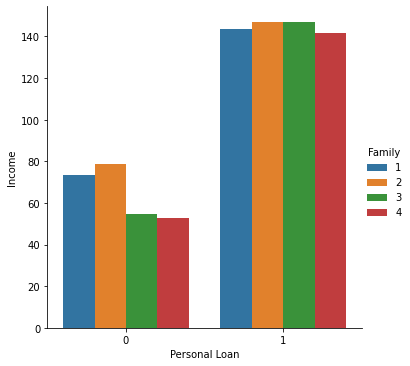

In [26]:
import seaborn as sn
sn.catplot(x = 'Personal Loan', y = 'Income', data = ubank, kind = 'bar', ci = None, hue = 'Family')

In [27]:
#############################################################################################
#5.Based on these outputs what are some key insights from the analysis? (2-3 bullet points)  #
#############################################################################################

We can see that Income is the greatest factor in determining whether someone gets a Personal Loan or not.
Even when we compare it to our second most important variable, which is Family Size, we can see that for those who did not get a personal loan, as their family size increased, their incomes decreased.

But for those who did get a personal loan, their income was high regardless of the family size. Income was the highest contributing factor.